# Reduce MOdel Complexity


In [24]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [25]:
X, y   = make_moons(n_samples=100, random_state=42)

In [5]:
X

array([[ 1.51839257e+00, -3.55142763e-01],
       [ 1.84408430e-02,  3.08841371e-01],
       [ 7.15472413e-01, -4.58667853e-01],
       [-9.67294863e-01,  2.53654584e-01],
       [-9.49055747e-01,  3.15108218e-01],
       [-8.01413622e-01,  5.98110530e-01],
       [ 1.59599895e-01,  9.87181783e-01],
       [ 1.34536505e+00, -4.38468422e-01],
       [ 8.01413622e-01,  5.98110530e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 4.04783343e-01,  9.14412623e-01],
       [-3.45365054e-01,  9.38468422e-01],
       [ 9.03976974e-01, -4.95379113e-01],
       [-5.18392568e-01,  8.55142763e-01],
       [ 1.83808810e+00, -4.55349012e-02],
       [ 9.67294863e-01,  2.53654584e-01],
       [ 1.09602303e+00, -4.95379113e-01],
       [ 1.15959990e+00, -4.87181783e-01],
       [ 7.18349350e-01,  6.95682551e-01],
       [-4.04783343e-01,  9.14412623e-01],
       [ 5.09442530e-02,  1.84891782e-01],
       [ 1.76144596e+00, -1.48228395e-01],
       [-9.60230259e-02,  9.95379113e-01],
       [-9.

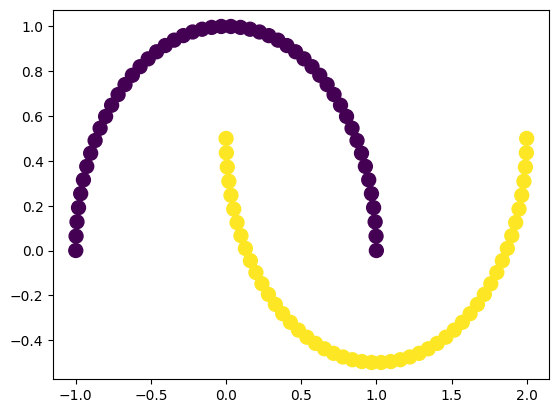

In [26]:
plt.scatter(X[:,0], X[:,1], c=y ,s=100)
plt.show()

In [27]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.get_weights()[0]

array([[ 0.00607169, -0.28068468,  0.27665222,  0.4919116 ,  0.11416721,
         0.33837467, -0.6408607 ,  0.6731935 ,  0.49035138,  0.01392853],
       [ 0.11580253, -0.5285579 ,  0.07458156, -0.5910212 , -0.49455565,
        -0.705389  ,  0.13376969, -0.3079168 ,  0.24040747,  0.11392343]],
      dtype=float32)

In [29]:
old_weights = model.get_weights()[0]

In [30]:
X_train,X_test, y_train , y_test= train_test_split(X,y, random_state=42)

In [31]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 2s 8ms/step - loss: 1.0380 - accuracy: 0.4400
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 1.0222 - accuracy: 0.4400
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 1.0070 - accuracy: 0.4400
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9924 - accuracy: 0.4400
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9781 - accuracy: 0.4400
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9636 - accuracy: 0.4400
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9511 - accuracy: 0.4400
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9371 - accuracy: 0.4400
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9243 - accuracy: 0.4400
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9133 - accuracy: 0.4400
Epoch 11/100
3/3 [===========

In [32]:
new_weights = model.get_weights()[0]

In [33]:
new_weights

array([[-0.31396216, -0.09817589,  0.15485674, -0.52394146,  0.03893109,
         0.53530616, -0.23295023,  0.767504  ,  0.4720938 ,  0.1719282 ],
       [ 0.71559596, -0.7295399 , -1.0719596 ,  0.9095074 ,  0.9313327 ,
        -0.26343146, -0.08932029, -0.63374007, -0.3779602 , -0.49984318]],
      dtype=float32)

In [34]:
old_weights

array([[-0.05079639, -0.44874945, -0.17547637, -0.20581436,  0.36840302,
         0.23633087, -0.5283792 ,  0.48565394,  0.6779477 , -0.08235985],
       [ 0.3431912 , -0.31081784, -0.66283   ,  0.4939838 ,  0.5316598 ,
         0.13182002,  0.28347933, -0.22572571, -0.65596545, -0.14125162]],
      dtype=float32)

In [35]:
percentage_change = abs(100*(old_weights - new_weights)/old_weights)

In [36]:
percentage_change

array([[518.0797  ,  78.12234 , 188.24933 , 154.56992 ,  89.43247 ,
        126.50709 ,  55.912308,  58.03516 ,  30.364275, 308.75244 ],
       [108.51232 , 134.71622 ,  61.72467 ,  84.116844,  75.17457 ,
        299.84174 , 131.50858 , 180.75671 ,  42.38108 , 253.8672  ]],
      dtype=float32)

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

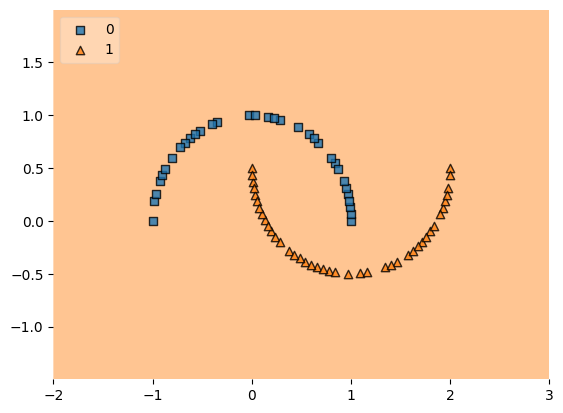

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.astype('int'),clf=model,legend=2)